In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
folder_paths =["../snakemake-workflow/output/weight_loss/all_chloroplast.100/cmon_name_annot/",
              "../snakemake-workflow/output/weight_loss/all_chloroplast.1000/cmon_name_annot",
              "../snakemake-workflow/output/weight_loss/crop_chloroplast.100/cmon_name_annot/",
              "../snakemake-workflow/output/weight_loss/crop_chloroplast.1000/cmon_name_annot/",
              "../snakemake-workflow/output/weight_loss/trnl.1/cmon_name_annot/"
              ]
dataframes = []

In [109]:
for folder_path in folder_paths:
    print(f"{folder_path}")
    files = os.listdir(folder_path)
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            dataframes.append(df)
final_df = pd.concat(dataframes, ignore_index=True)

../snakemake-workflow/output/weight_loss/all_chloroplast.100/cmon_name_annot/
../snakemake-workflow/output/weight_loss/all_chloroplast.1000/cmon_name_annot
../snakemake-workflow/output/weight_loss/crop_chloroplast.100/cmon_name_annot/
../snakemake-workflow/output/weight_loss/crop_chloroplast.1000/cmon_name_annot/
../snakemake-workflow/output/weight_loss/trnl.1/cmon_name_annot/


In [110]:
db_key_dict = {'db.crop-plant-entrez.ref.1000.sig.zip': 'crop_chloroplast', 
                'db.plant-entrez-ref.1000.sig.zip': 'all_chloroplast', 
                'db.crop-plant-entrez.ref.100.sig.zip': 'crop_chloroplast', 
                'db.plant-entrez-ref.100.sig.zip': 'all_chloroplast', 
                'db.trnL-entrez-ref.fasta.bz2.sig': 'trnl_1'}

In [112]:
final_df.shape

(19484, 42)

In [114]:
final_df.groupby('filename').size()

filename
../db/Sketched-db/db.trnL-entrez-ref.fasta.bz2.sig                                       6073
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.100.sig.zip     2559
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.1000.sig.zip     476
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.100.sig.zip          9124
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.1000.sig.zip         1252
dtype: int64

In [115]:
final_df.columns

Index(['intersect_bp', 'f_orig_query', 'f_match', 'f_unique_to_query',
       'f_unique_weighted', 'average_abund', 'median_abund', 'std_abund',
       'filename', 'name', 'md5', 'f_match_orig', 'unique_intersect_bp',
       'gather_result_rank', 'remaining_bp', 'query_filename', 'query_name',
       'query_md5', 'query_bp', 'ksize', 'moltype', 'scaled', 'query_n_hashes',
       'query_abundance', 'query_containment_ani', 'match_containment_ani',
       'average_containment_ani', 'max_containment_ani',
       'potential_false_negative', 'n_unique_weighted_found',
       'sum_weighted_found', 'total_weighted_hashes', 'scientific_name',
       'Unnamed: 0_x', 'USDA_id', 'usda_common_name', 'Unnamed: 0_y',
       'trnL_id', 'trnl_common_name', 'Unnamed: 0', 'foodb_id',
       'foodb_common_name'],
      dtype='object')

In [116]:
def db_shorthand(filename):
    return db_key_dict[filename.split('/')[-1]]

In [117]:
final_df['filename'].value_counts()

/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.100.sig.zip          9124
../db/Sketched-db/db.trnL-entrez-ref.fasta.bz2.sig                                       6073
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.100.sig.zip     2559
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.1000.sig.zip         1252
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.1000.sig.zip     476
Name: filename, dtype: int64

In [118]:
final_df['db'] = final_df['filename'].apply(db_shorthand)

In [119]:
final_df['db'].unique()

array(['all_chloroplast', 'crop_chloroplast', 'trnl_1'], dtype=object)

In [120]:
def cmon_name_col(df):
    priority_order =['usda_common_name','trnl_common_name','foodb_common_name']
    df['common_name'] = df['usda_common_name']
    for column in priority_order[1:]:
        df['common_name'] = df['common_name'].combine_first(df[column])

In [121]:
cmon_name_col(final_df)

In [122]:
final_df['usda_common_name'].value_counts()

velvet bean              162
avocado                   99
rough lemon               96
oysternut                 90
tea                       86
                        ... 
California fan palm        1
buzzy lizzy                1
alligatorweed              1
narrowleaf goldshower      1
pygmy waterlily            1
Name: usda_common_name, Length: 592, dtype: int64

In [123]:
final_df['common_name'].value_counts()

velvet bean          162
avocado               99
rough lemon           96
oysternut             90
tea                   86
                    ... 
Brazilian vervain      1
dragontree             1
flame bottletree       1
fuchsia begonia        1
meadow ryegrass        1
Name: common_name, Length: 671, dtype: int64

## chart making

In [79]:
all_chloroplast_100.columns

Index(['intersect_bp', 'f_orig_query', 'f_match', 'f_unique_to_query',
       'f_unique_weighted', 'average_abund', 'median_abund', 'std_abund',
       'filename', 'name', 'md5', 'f_match_orig', 'unique_intersect_bp',
       'gather_result_rank', 'remaining_bp', 'query_filename', 'query_name',
       'query_md5', 'query_bp', 'ksize', 'moltype', 'scaled', 'query_n_hashes',
       'query_abundance', 'query_containment_ani', 'match_containment_ani',
       'average_containment_ani', 'max_containment_ani',
       'potential_false_negative', 'n_unique_weighted_found',
       'sum_weighted_found', 'total_weighted_hashes', 'scientific_name',
       'Unnamed: 0_x', 'USDA_id', 'usda_common_name', 'Unnamed: 0_y',
       'trnL_id', 'trnl_common_name', 'Unnamed: 0', 'foodb_id',
       'foodb_common_name', 'common_name'],
      dtype='object')

In [124]:
grouped = final_df.groupby(['query_name', 'ksize', 'scaled','db']).size().reset_index(name='match_count')

In [125]:
grouped_2 = final_df.dropna(subset=['common_name'], inplace=False).groupby(['query_name', 'ksize', 'scaled','db']).size().reset_index(name='common_name_match_count')

In [126]:
grouped

,query_name,ksize,scaled,db,match_count
0,ERR11520689,21,100,all_chloroplast,130
1,ERR11520689,21,100,crop_chloroplast,27
2,ERR11520689,21,100,trnl_1,66
3,ERR11520689,21,1000,all_chloroplast,18
4,ERR11520689,21,1000,crop_chloroplast,6
...,...,...,...,...,...
593,ERR11520728,51,100,all_chloroplast,27
594,ERR11520728,51,100,crop_chloroplast,15
595,ERR11520728,51,100,trnl_1,27
596,ERR11520728,51,1000,all_chloroplast,7


In [127]:
grouped_2

,query_name,ksize,scaled,db,common_name_match_count
0,ERR11520689,21,100,all_chloroplast,36
1,ERR11520689,21,100,crop_chloroplast,26
2,ERR11520689,21,100,trnl_1,20
3,ERR11520689,21,1000,all_chloroplast,4
4,ERR11520689,21,1000,crop_chloroplast,6
...,...,...,...,...,...
578,ERR11520728,51,100,all_chloroplast,11
579,ERR11520728,51,100,crop_chloroplast,15
580,ERR11520728,51,100,trnl_1,10
581,ERR11520728,51,1000,all_chloroplast,4


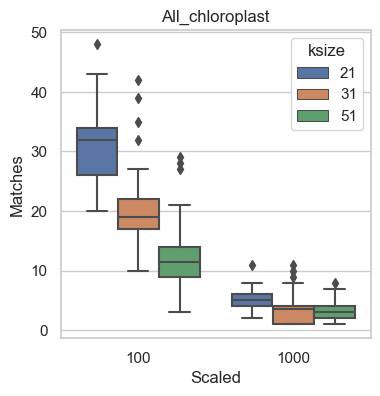

In [133]:
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))

# Draw the box plot
sns.boxplot(x='scaled', y='match_count', hue='ksize',data=grouped[grouped['db']==''])

# Set labels and title
plt.xlabel('Scaled')
plt.ylabel('Matches')
plt.title('All_chloroplast')

# Show the plot
plt.show()

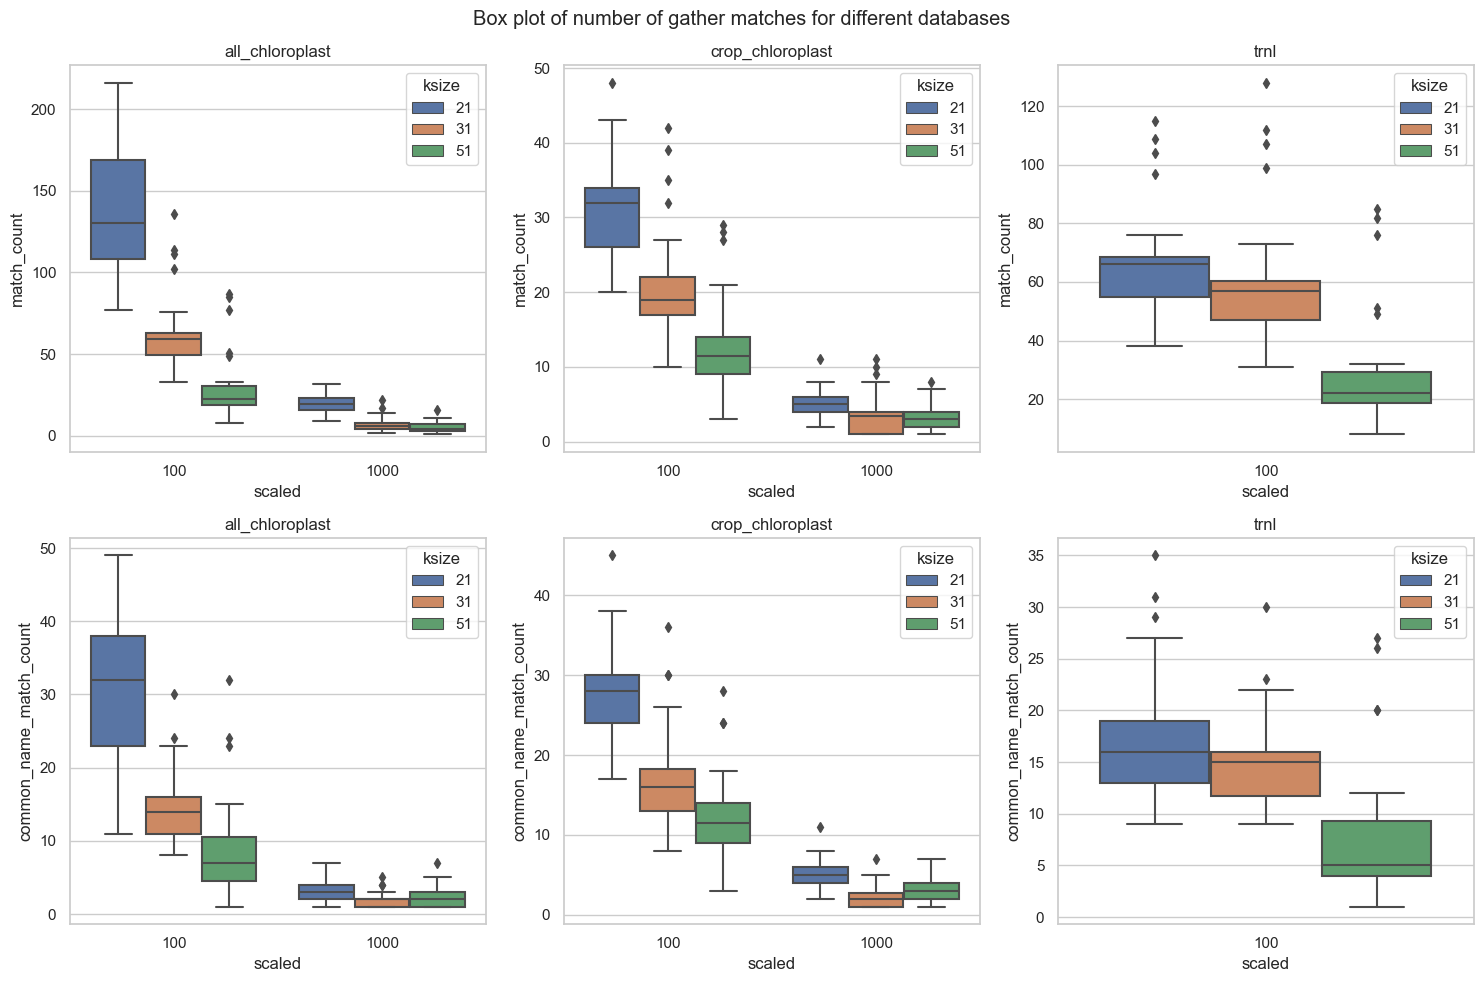

In [156]:


# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot the first box plot
sns.boxplot(x='scaled', y='match_count', hue='ksize', data=grouped[grouped['db'] == 'all_chloroplast'], ax=axes[0,0])
axes[0,0].set_title('all_chloroplast')

# Plot the second box plot
sns.boxplot(x='scaled', y='match_count', hue='ksize', data=grouped[grouped['db'] == 'crop_chloroplast'], ax=axes[0,1])
axes[0,1].set_title('crop_chloroplast')

# Plot the third box plot
sns.boxplot(x='scaled', y='match_count', hue='ksize', data=grouped[grouped['db'] == 'trnl_1'], ax=axes[0,2])
axes[0,2].set_title('trnl')


# Plot the first box plot
sns.boxplot(x='scaled', y='common_name_match_count', hue='ksize', data=grouped_2[grouped_2['db'] == 'all_chloroplast'], ax=axes[1,0])
axes[1,0].set_title('all_chloroplast')

# Plot the second box plot
sns.boxplot(x='scaled', y='common_name_match_count', hue='ksize', data=grouped_2[grouped_2['db'] == 'crop_chloroplast'], ax=axes[1,1])
axes[1,1].set_title('crop_chloroplast')

# Plot the third box plot
sns.boxplot(x='scaled', y='common_name_match_count', hue='ksize', data=grouped_2[grouped_2['db'] == 'trnl_1'], ax=axes[1,2])
axes[1,2].set_title('trnl')

# Adjust layout and show the plots
plt.suptitle("Box plot of number of gather matches for different databases")
plt.tight_layout()
plt.show()


Summary stats

In [147]:
final_df.groupby(['db','scaled']).size()

db                scaled
all_chloroplast   100       9124
                  1000      1252
crop_chloroplast  100       2559
                  1000       476
trnl_1            100       6073
dtype: int64

In [151]:
final_df[final_df['db']=='all_chloroplast']['common_name'].value_counts()[:15]

velvet bean             79
locoto                  49
oysternut               41
multibloom hoarypea     38
chirauli nut            36
sponge gourd            36
theobroma               36
avocado                 33
herb bennet             33
coyote tobacco          33
cultivated cockscomb    32
jiang guo xian          31
snakegourd              29
splitlip hempnettle     29
American shoreweed      29
Name: common_name, dtype: int64

In [153]:
final_df[final_df['db']=='crop_chloroplast']['common_name'].value_counts()[:45]

rough lemon             96
tea                     86
velvet bean             83
food pokeweed           74
coriander               68
Ethiopian mustard       66
candyleaf               66
rocoto                  61
Indian lettuce          59
figleaf gourd           59
Amur grape              58
timothy                 56
peach palm              51
cassava                 43
theobroma               42
Mexican tea             40
West Indian vanilla     40
thorny olive            40
kudzu                   38
snakegourd              38
sieva bean              38
Javanese long pepper    37
shagbark hickory        37
cherimoya               35
garden tomato           35
lentil                  33
apple                   33
avocado                 33
silver cock's comb      32
sweet basil             32
wild chives             31
Mexican groundcherry    30
cluster mallow          30
air yam                 30
field pumpkin           27
rotund boesenbergia     26
alfalfa                 26
c